# Weather Prediction Using Random Forest Optimization

## This Script Contains the Following:
1. Importing Files and Libraries
2. Preparing Datasets
3. Random Forest Optimization Using GridSearch
4. Weather Station: Maastricht, All Years

## 01. Importing Files and Libraries

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [4]:
path = r'/Users/niravbariya/Documents/Data Science/CareerFoundry/Machine Learning Specialization/Achievement 1 & 2/02 Data Sets'

In [5]:
tf.random.set_seed(42)

In [6]:
weather_cleaned = pd.read_csv(os.path.join(path, 'Unsupervised', 'weather_cleaned.csv'), index_col=False)

In [7]:
weather_cleaned.head(3)

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0                  7            0.85           1.018                    0.32   
1                  6            0.84           1.018                    0.36   
2                  8            0.90           1.018                    0.18   

   BASEL_precipitation  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0.09             0.7              6.5             0.8   
1                 1.05             1.1              6.1             3.3   
2                 0.30             0.0              8.5             5.1   

   BASEL_temp_max  BELGRADE_cloud_cover  ...  VALENTIA_cloud_cover  \
0            10.9                     1  ...                     5   
1            10.1                     6  ...                     7   
2             9.9                     6  ...                     7   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.88             1.0003                       0.45   
1               0.91             1.0007                       0.25   
2               0.91             1.0096                       0.17   

   VALENTIA_precipitation  VALENTIA_sunshine  VALENTIA_temp_mean  \
0                    0.34                4.7                 8.5   
1                    0.84                0.7                 8.9   
2                    0.08                0.1                10.5   

   VALENTIA_temp_min  VALENTIA_temp_max        DATE  
0                6.0               10.9  1960-01-01  
1                5.6               12.1  1960-01-02  
2                8.1               12.9  1960-01-03  

[3 rows x 136 columns]

In [8]:
weather_pred = pd.read_csv(os.path.join(path, 'Unsupervised', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'),index_col=False)

## 02. Preparing Datasets

In [9]:
# Making sure the date format is consistent
weather_pred['DATE'] = pd.to_datetime(weather_pred['DATE'], format = '%Y%m%d')

In [10]:
weather_cleaned['DATE'] = pd.to_datetime(weather_cleaned['DATE'])

In [92]:
# Subsetting a Decade of data from 2012 to 2022
df = weather_cleaned.loc[(weather_cleaned['DATE'].dt.year >= 2012) & (weather_cleaned['DATE'].dt.year < 2022)]

In [93]:
# Setting X and y
X=df.drop(columns = 'DATE')
y=weather_pred.loc[(weather_pred['DATE'].dt.year >= 2012) & (weather_pred['DATE'].dt.year < 2022)].drop(columns = 'DATE')

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [95]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2922, 135) (2922, 15)
(731, 135) (731, 15)


## 03. Random Forest Optimization Using GridSearch

In [97]:
# creating a RF classifier
clf = RandomForestClassifier()

In [98]:
# Grid search cv with a small number of hyperparameters
grid_space={'max_depth':[3,5],#,10,None],
              'n_estimators':[10,100],#,200],
              'max_features':[3,5], #,7],
              #'min_samples_leaf':[1,2,3],
              #'min_samples_split':[1,2,3]
            #'criterion':['gini','entropy','log_loss']
           }

In [99]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Search took 0.015191964308420817 minutes


In [100]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 5, 'max_features': 5, 'n_estimators': 10}
Best GRID search score is: 0.44284736481861736


In [101]:
# Defining another Grid
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[3,5,7],
              'min_samples_leaf':[2, 3],
              'min_samples_split':[2,3],
             'criterion':['gini','entropy','log_loss']
           }

In [102]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Search took 1.9500981489817302 minutes


In [103]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.5516769336071184


In [104]:
# Redefining the Grid
grid_space={'max_depth':[3,5,None],
              'n_estimators':[100,200],
              'max_features':[5,10,None],
              'min_samples_leaf':[2,3],
              'min_samples_split':[2,3,5],
             'criterion':['gini','entropy']
           }

In [105]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Search took 7.180980400244395 minutes


In [106]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 0.6546885694729637


In [113]:
# performing predictions on the test dataset
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.6142270861833106


In [114]:
station = ['Basel','Belgrade', 'Budapest','Debilt','Dusseldorf','Heathrow','Kassel','Ljubljana','Maastricht','Madrid',
          'MunchenB','Oslo','Sonnblick','Stockholm','Valentia']

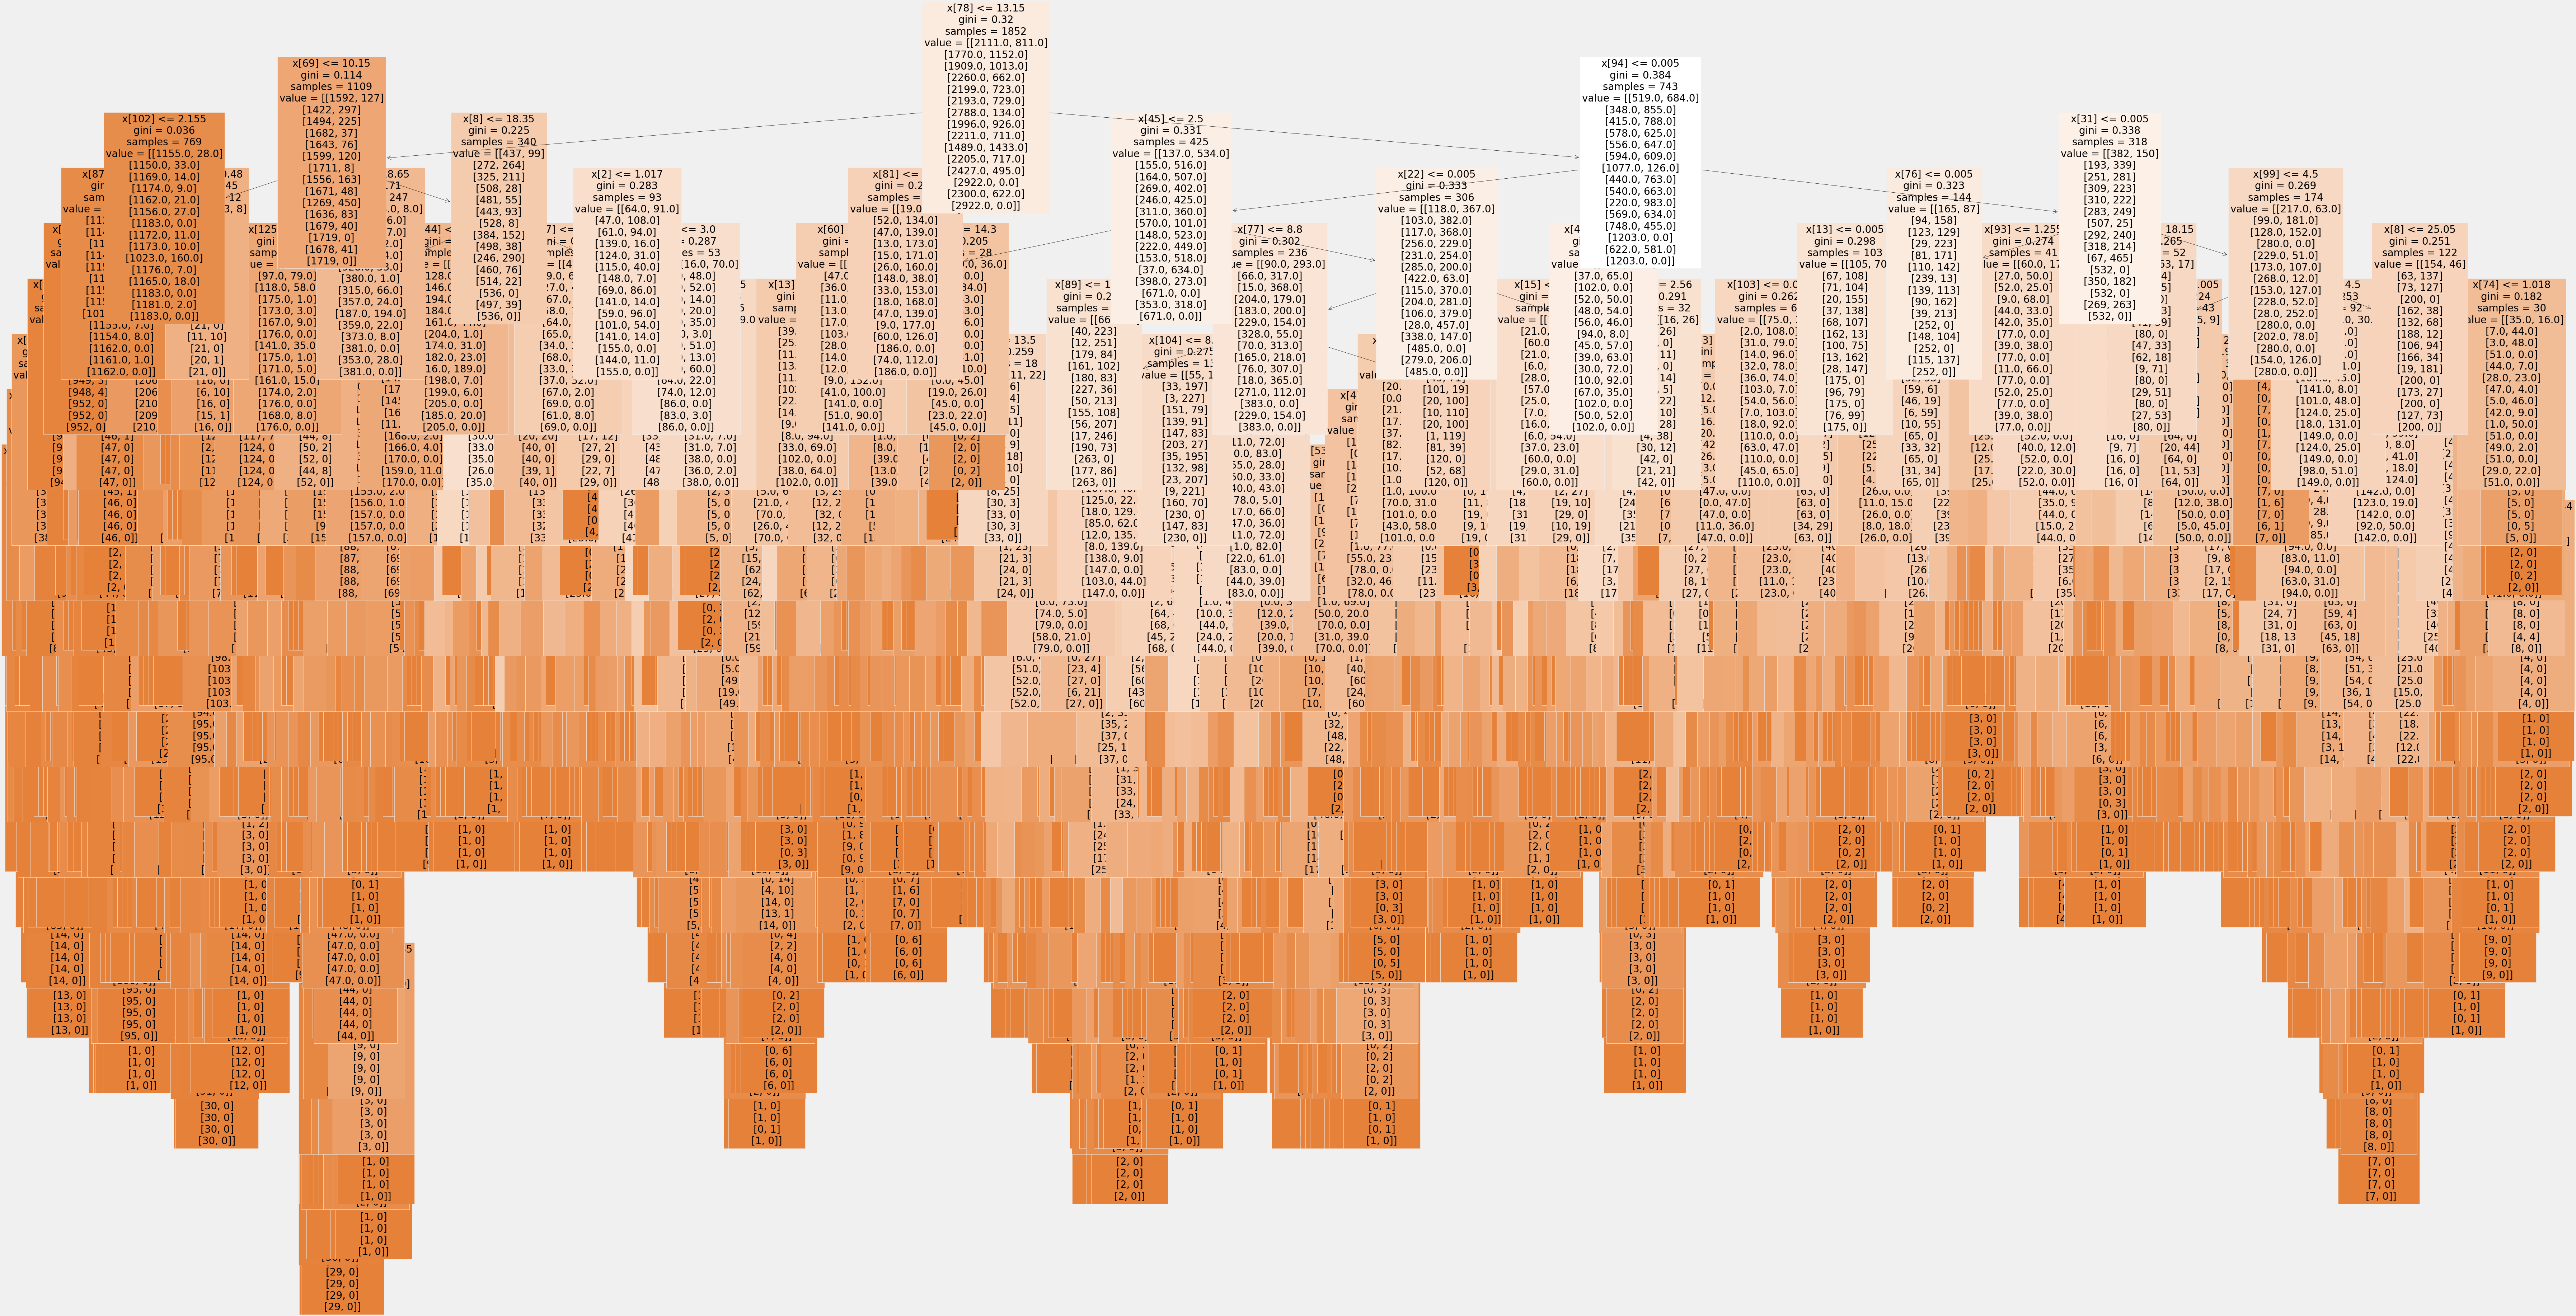

In [115]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[11], fontsize = 20, class_names=station, filled=True);

In [116]:
fig.savefig(f"{path}/decision_tree_11_GridSearched.png")

In [117]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_

In [118]:
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.00352214, 0.00437469, 0.00359034, 0.0039156 , 0.01771058,
         0.00824004, 0.02157857, 0.00325974, 0.04014549],
        [0.0037063 , 0.00322156, 0.00407213, 0.00267856, 0.01728958,
         0.00306974, 0.01349102, 0.00323956, 0.01320541],
        [0.        , 0.        , 0.        , 0.00047501, 0.01758569,
         0.00041809, 0.02019655, 0.00406521, 0.01197969],
        [0.00243694, 0.00307211, 0.00473406, 0.00409474, 0.01739802,
         0.00535436, 0.01557532, 0.0029615 , 0.01903643],
        [0.00307678, 0.00349708, 0.00445334, 0.00378362, 0.02168907,
         0.00924005, 0.02529057, 0.00467341, 0.05236236],
        [0.0025356 , 0.00459497, 0.00389966, 0.00588148, 0.00992893,
         0.00446056, 0.00949015, 0.00296358, 0.01418767],
        [0.00340805, 0.00167718, 0.00130375, 0.00195094, 0.00224603,
         0.00204001, 0.00192524, 0.00129736, 0.00219191],
        [0.00373136, 0.00372425, 0.003377  , 0.00395144, 0.01812359,
         0.00483076, 0.020524  , 0.0054481

In [120]:
sumarray = np.sum(newarray[0], axis=1)

In [121]:
important = pd.Series(sumarray, index = station) #.sort_values(ascending = False)
important

Basel         0.106337
Belgrade      0.063974
Budapest      0.054720
Debilt        0.074663
Dusseldorf    0.128066
Heathrow      0.057943
Kassel        0.018040
Ljubljana     0.094279
Maastricht    0.114423
Madrid        0.061626
MunchenB      0.077426
Oslo          0.061135
Sonnblick     0.032463
Stockholm     0.052299
Valentia      0.002605
dtype: float64

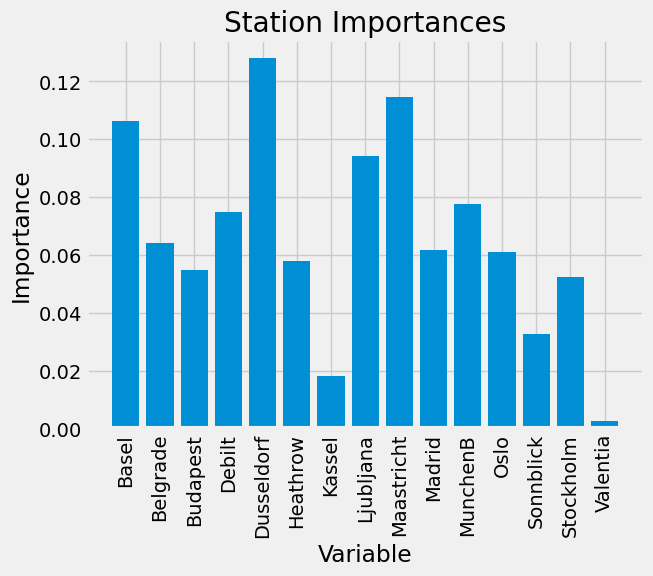

In [122]:
%matplotlib inline
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, station, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Station Importances');

## 04. Weather Station: Maastricht, All Years

In [124]:
#loading original dataset
df1 = pd.read_csv(os.path.join(path,'Unsupervised','Dataset-weather-prediction-dataset-processed.csv'),index_col = False)

In [126]:
df1 = df1[['MAASTRICHT_cloud_cover','MAASTRICHT_wind_speed','MAASTRICHT_humidity','MAASTRICHT_pressure','MAASTRICHT_global_radiation',
          'MAASTRICHT_precipitation','MAASTRICHT_sunshine','MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max']]

In [127]:
df1.head()

MAASTRICHT_cloud_cover  MAASTRICHT_wind_speed  MAASTRICHT_humidity  \
0                       7                    8.7                 0.83   
1                       8                    5.7                 0.92   
2                       7                    3.6                 0.97   
3                       7                    5.1                 0.89   
4                       7                    6.2                 0.92   

   MAASTRICHT_pressure  MAASTRICHT_global_radiation  MAASTRICHT_precipitation  \
0               1.0063                         0.22                      0.32   
1               1.0062                         0.17                      1.34   
2               1.0167                         0.12                      0.46   
3               1.0277                         0.16                      0.00   
4               1.0259                         0.12                      0.56   

   MAASTRICHT_sunshine  MAASTRICHT_temp_mean  MAASTRICHT_temp_min  \
0                  1.0                   9.5                  8.5   
1                  0.4                   8.6                  7.5   
2                  0.0                   6.9                  5.5   
3                  0.3                   7.0                  3.0   
4                  0.0                   8.1                  2.5   

   MAASTRICHT_temp_max  
0                 11.1  
1                  9.9  
2                  9.9  
3                 10.0  
4                 11.1

In [128]:
X=df1
y=weather_pred['MAASTRICHT_pleasant_weather']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [51]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(18360, 10) (18360,)
(4590, 10) (4590,)


In [58]:
grid_space={'max_depth':[2,3,5,None],
              'n_estimators':[50,100],
              'max_features':[5,10],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[2,3,5],
             'criterion':['gini','entropy']
           }

In [79]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Search took 0.6487977345784505 minutes


In [80]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'criterion': 'gini', 'max_depth': 3, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best GRID search score is: 1.0


In [84]:
# performing predictions on the test dataset
clf1 = RandomForestClassifier(n_estimators = 50, max_depth=3, max_features = 10, min_samples_leaf = 1, min_samples_split = 2,
                             criterion = 'gini')  
clf1.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("F1-Score: ", metrics.f1_score(y_test, y_pred))

Model Accuracy:  1.0
F1-Score:  1.0


In [85]:
prediction = {0:'Unpleasant', 1:'Pleasant'}

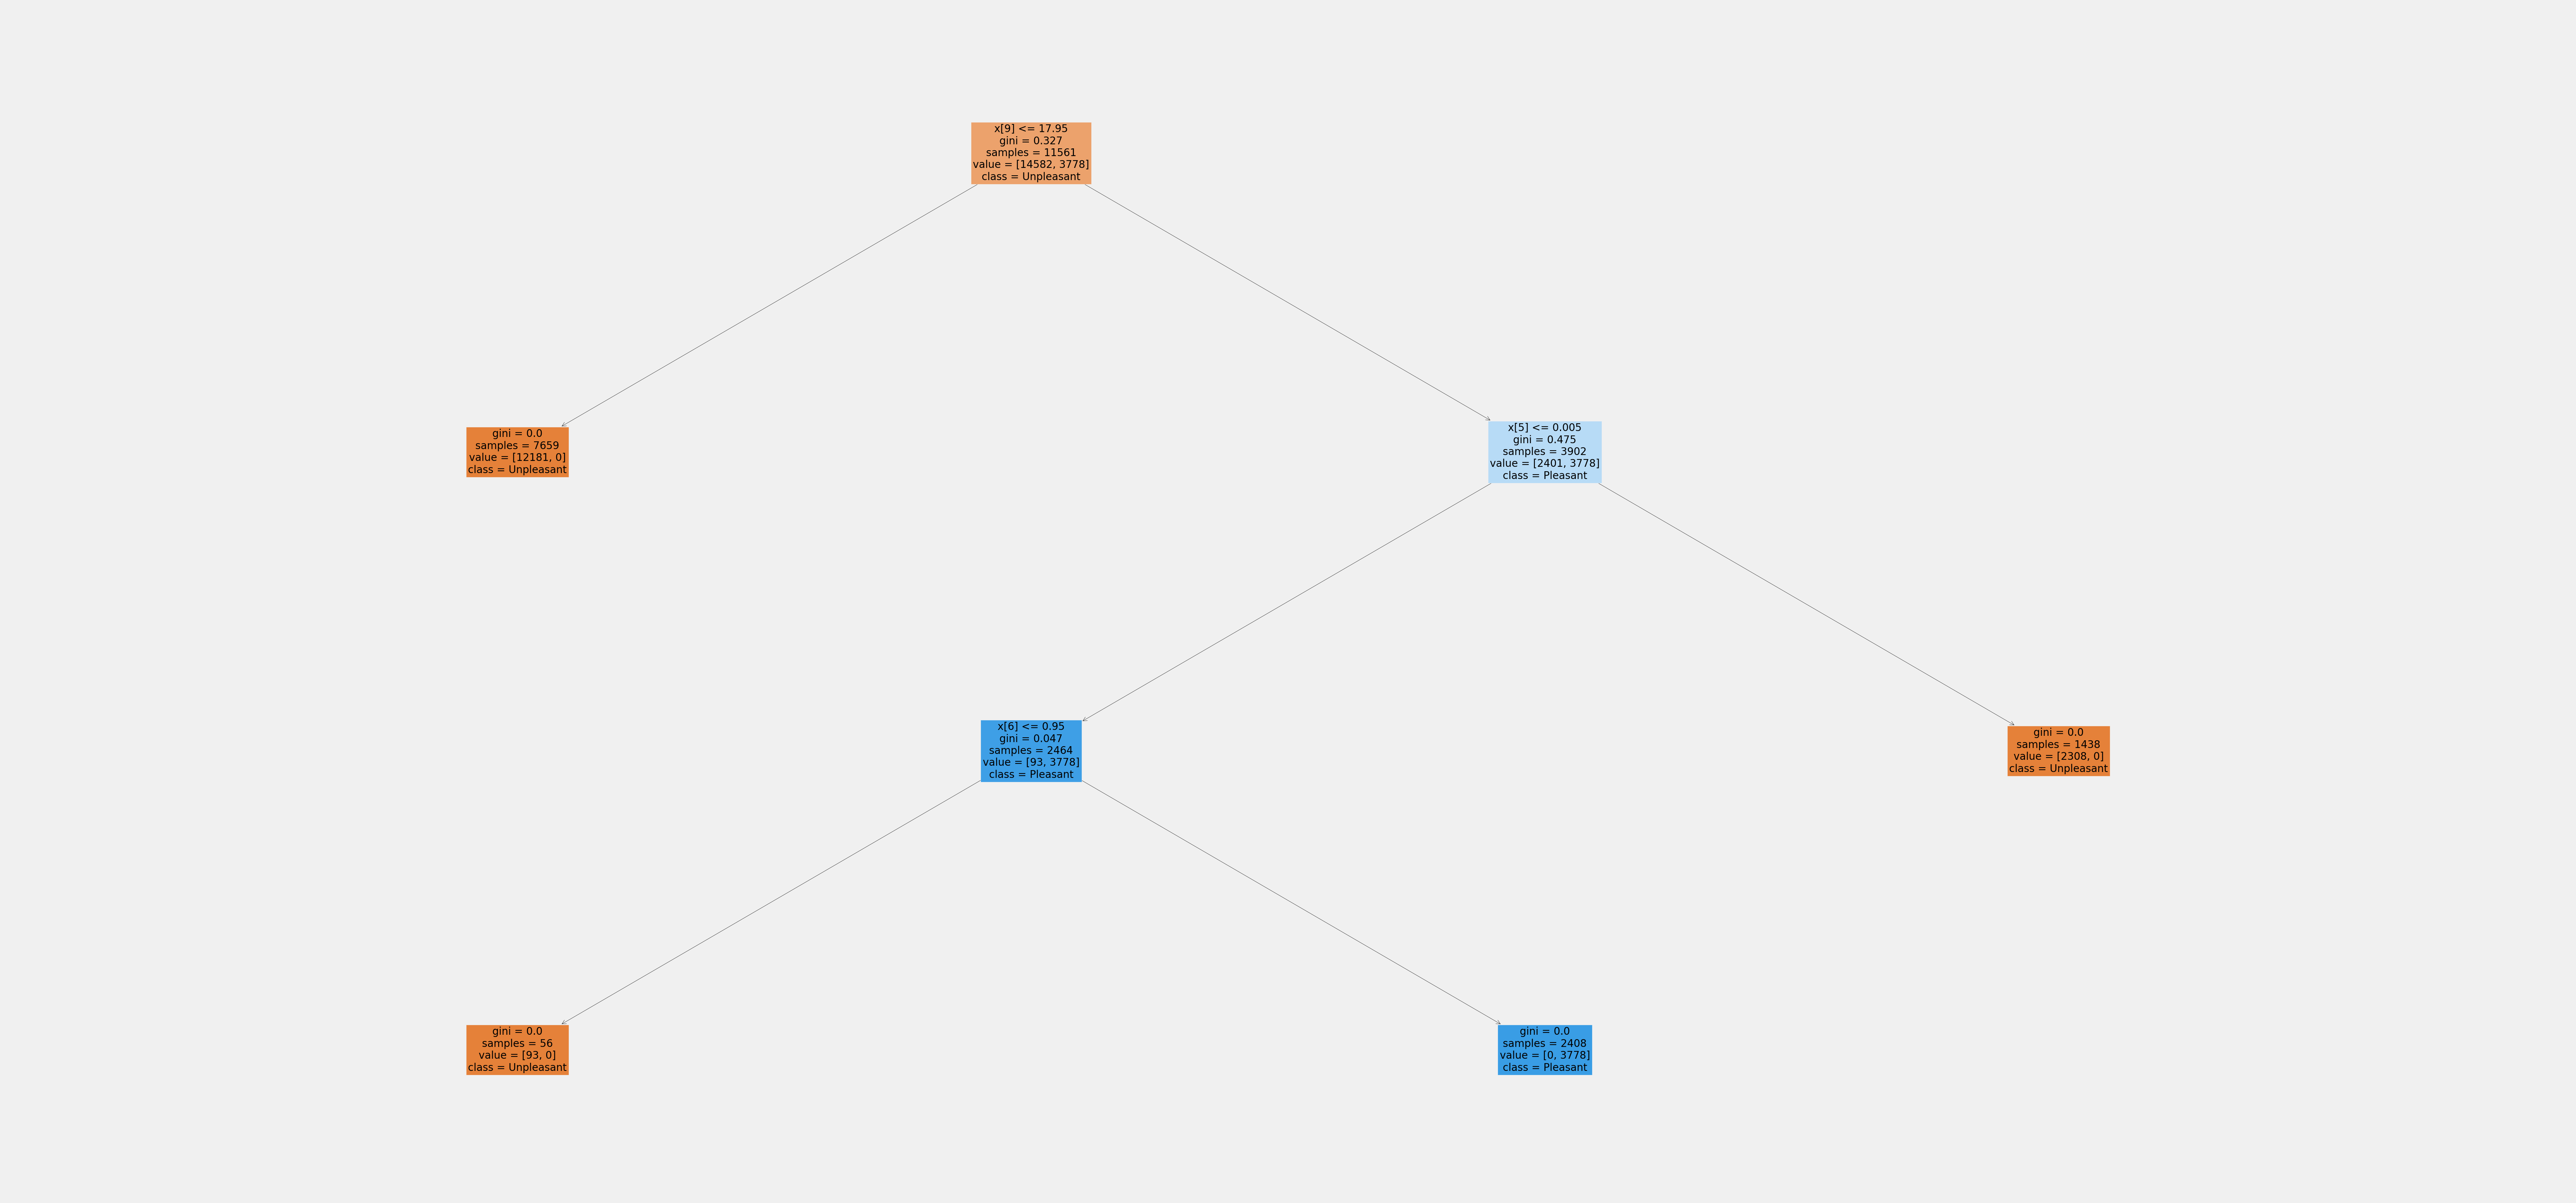

In [86]:
# Plotting only Single Decision Tree from 100
fig = plt.figure(figsize=(80,40))
plot_tree(clf1.estimators_[10], fontsize = 20, class_names=prediction, filled=True);

In [71]:
fig.savefig(f"{path}/decision_tree_depth_3_MAASTRICHT.png")

In [72]:
imp_features = clf1.feature_importances_
imp_features

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.45769259, 0.03124788, 0.        , 0.        , 0.51105953])

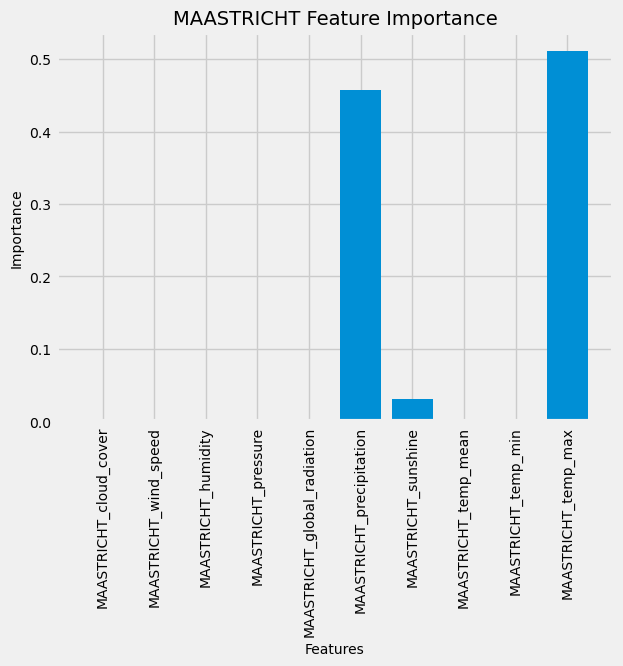

In [73]:
%matplotlib inline
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(imp_features)))

plt.bar(x_values, imp_features, orientation = 'vertical')
plt.xticks(x_values, X_train.columns.to_list(), rotation='vertical',fontsize=10)
plt.ylabel('Importance',fontsize=10); plt.xlabel('Features',fontsize=10); plt.title('MAASTRICHT Feature Importance',fontsize=14);
plt.yticks(fontsize=10);

Only 3 features were important in predicting pleasant or unpleasant day. In comparion the original random forest classifier used all features.

In [129]:
plt.savefig(os.path.join(path,'LJUBLJANA 3 important features.png'))

<Figure size 640x480 with 0 Axes>